In [197]:
import pandas
from matplotlib import pyplot
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_squared_log_error, 
import numpy

df = pandas.read_csv('/home/jouny/itmo/оптимизация/lab4/train.csv')
df = df.drop(['Id'], axis=1)
missing = df.isnull().sum()
df = df.drop([key for key in missing.keys() if missing[key]/len(missing) > 0], axis=1)
df = pandas.get_dummies(df)

In [198]:
x_train, x_test, y_train, y_test = train_test_split(
    df.LotArea,
    df.SalePrice,
    test_size=0.3,
    random_state=42
)
assert isinstance(x_train, pandas.Series)
assert isinstance(x_test, pandas.Series)
assert isinstance(y_train, pandas.Series)
assert isinstance(y_test, pandas.Series)

In [199]:
y = df.SalePrice
X = df.drop(['SalePrice'], axis=1)

In [200]:
x_train, x_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)
regressor = Lasso().fit(x_train, y_train)

/usr/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


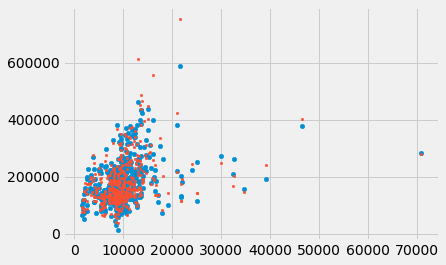

In [201]:
predicted = regressor.predict(x_test)
pyplot.scatter(x_test.LotArea, predicted, s=20)
_ = pyplot.scatter(x_test.LotArea, y_test, s=6)

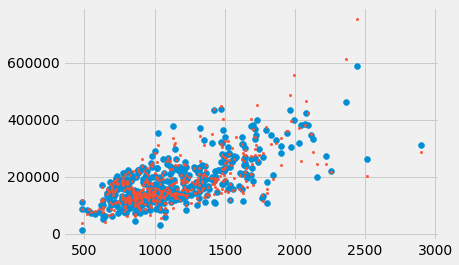

In [202]:
pyplot.scatter(x_test['1stFlrSF'], predicted)
_ = pyplot.scatter(x_test['1stFlrSF'], y_test, s=6)

In [215]:
mse = mean_squared_error(y_test, predicted)
msle = mean_squared_log_error(y_test,predicted)
print(f'mean squared error {mse} root {mse**.5}', f'mean squared log error {msle}', sep='\n')

mean squared error 736283930.9898757 root 27134.552345485186
mean squared log error 0.02690986655263991


In [216]:
train_predicted = regressor.predict(x_train)
mse = mean_squared_error(y_train, train_predicted)
msle = mean_squared_log_error(y_train, train_predicted)
print(f'mean squared error {mse} root {mse**.5}', f'mean squared log error {msle}', sep='\n')

mean squared error 471744925.2553561 root 21719.689805689126
mean squared log error 0.013706986548178802
